<a href="https://colab.research.google.com/github/SJanna/OptimizationProblems/blob/main/Taylor_Error_and_Levy_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad número 2

#Punto 1

In [ ]:
import sympy as sp
x = sp.Symbol('x')
f= 2*x+sp.cos(x)+1
a=0 #Punto de expanción
n1=4 #Grado
n2=8 #Grado
n3=12 #Grado
n4=16 #Grado
def error_absoluto (funcion_real, funcion_aprox, nprueba):
    vreal=funcion_real.subs(x,nprueba)
    vaprox=funcion_aprox.subs(x,nprueba)
    return float(abs(vreal-vaprox))

def taylor(f,a,n):
    fx=0
    for i in range(0,n+1):
        fna=sp.diff(f,x,i).subs(x,a)
        fx += (fna*(x-a)**i)/sp.factorial(i)
    return fx

In [ ]:
# Polinomio 1
pol1=taylor(f,a,n1)
pol2=taylor(f,a,n2)
pol3=taylor(f,a,n3)
pol4=taylor(f,a,n4)
print(f'Polinomio 1: {pol1}')
print(f'Polinomio 2: {pol2}')
print(f'Polinomio 3: {pol3}')
print(f'Polinomio 4: {pol4}')

Polinomio 1: x**4/24 - x**2/2 + 2*x + 2
Polinomio 2: x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 2*x + 2
Polinomio 3: x**12/479001600 - x**10/3628800 + x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 2*x + 2
Polinomio 4: x**16/20922789888000 - x**14/87178291200 + x**12/479001600 - x**10/3628800 + x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 2*x + 2


In [ ]:
p_evaluacion=5
print(f'Error para el polinomio 1: {error_absoluto(f,pol1,p_evaluacion)}')
print(f'Error para el polinomio 2: {error_absoluto(f,pol2,p_evaluacion)}')
print(f'Error para el polinomio 3: {error_absoluto(f,pol3,p_evaluacion)}')
print(f'Error para el polinomio 4: {error_absoluto(f,pol4,p_evaluacion)}')

Error para el polinomio 1: 14.258004481203441
Error para el polinomio 2: 2.244735631997091
Error para el polinomio 3: 0.06327762642884258
Error para el polinomio 4: 0.0005586550870891639



**Conclusiones sobre el error** \\
Por lo general el error es menor para un **n** mayor de la misma función, que es lo esperado ya que la aproximación es más cercana.
Sin embargo para algunos $n$ (cercanos) el error dado por un $n_1 < n_2$ puede ser menor que el error que produce $n_2$. \\

Otro valor importante a tener en cuenta es el punto de evaluación, a medida que este valor se aleja del valor del punto de expansión $a$, el error se hace más grande.

#Punto 2

Codigo estudiantil = 2000834**51**

In [ ]:
import sympy as sp

In [ ]:
n = 2
x = sp.Matrix([f'x{i}' for i in range(1,n+1)])
f=0
for i in range(0, n):
  f+= sp.sin(3*x[i]*sp.pi)**2 + (x[i]-1)**2 * (1+sp.sin(3*sp.pi+x[i])**2) + (x[i]-1)**2 * (1+sp.sin(2*sp.pi*x[i]))

  if i>0:
    f-=x[i]*x[i-1]
x

Matrix([
[x1],
[x2]])

In [ ]:
f

-x1*x2 + (x1 - 1)**2*(sin(x1)**2 + 1) + (x1 - 1)**2*(sin(2*pi*x1) + 1) + (x2 - 1)**2*(sin(x2)**2 + 1) + (x2 - 1)**2*(sin(2*pi*x2) + 1) + sin(3*pi*x1)**2 + sin(3*pi*x2)**2

In [ ]:
#Jacobiano de f
gf = sp.Matrix([f]).jacobian(x).T
gf

Matrix([
[-x2 + 2*(x1 - 1)**2*sin(x1)*cos(x1) + 2*pi*(x1 - 1)**2*cos(2*pi*x1) + (2*x1 - 2)*(sin(x1)**2 + 1) + (2*x1 - 2)*(sin(2*pi*x1) + 1) + 6*pi*sin(3*pi*x1)*cos(3*pi*x1)],
[-x1 + 2*(x2 - 1)**2*sin(x2)*cos(x2) + 2*pi*(x2 - 1)**2*cos(2*pi*x2) + (2*x2 - 2)*(sin(x2)**2 + 1) + (2*x2 - 2)*(sin(2*pi*x2) + 1) + 6*pi*sin(3*pi*x2)*cos(3*pi*x2)]])

In [ ]:
#Hessiano de f
Hf = gf.jacobian(x)
Hf

Matrix([
[-2*(x1 - 1)**2*sin(x1)**2 - 4*pi**2*(x1 - 1)**2*sin(2*pi*x1) + 2*(x1 - 1)**2*cos(x1)**2 + 2*(2*x1 - 2)*sin(x1)*cos(x1) + 4*pi*(2*x1 - 2)*cos(2*pi*x1) + (4*x1 - 4)*sin(x1)*cos(x1) + 2*sin(x1)**2 + 2*sin(2*pi*x1) - 18*pi**2*sin(3*pi*x1)**2 + 18*pi**2*cos(3*pi*x1)**2 + 4,                                                                                                                                                                                                                                                                           -1],
[                                                                                                                                                                                                                                                                          -1, -2*(x2 - 1)**2*sin(x2)**2 - 4*pi**2*(x2 - 1)**2*sin(2*pi*x2) + 2*(x2 - 1)**2*cos(x2)**2 + 2*(2*x2 - 2)*sin(x2)*cos(x2) + 4*pi*(2*x2 - 2)*cos(2*pi*x2) + (4*x2 - 4)*sin(x2)*cos(x2)

In [ ]:
import numpy as np
x0=[5,1] #Ultimos dos dígitos del código estudiantil
x0=np.array(x0)
x0

array([5, 1])

In [ ]:
to_rep = {x[i]:x0[i] for i in range(n)}
to_rep

{x1: 5, x2: 1}

In [ ]:
f0=f.subs(to_rep)
f0

16*sin(5)**2 + 27

In [ ]:
g0 = gf.subs(to_rep)
g0

Matrix([
[32*sin(5)*cos(5) + 8*sin(5)**2 + 15 + 32*pi],
[                                         -5]])

In [ ]:
dx0 = x-x0.reshape((-1,1))
dx0

Matrix([
[x1 - 5],
[x2 - 1]])

In [ ]:
L = f0 + dx0.dot(g0)
L

-5*x2 + (x1 - 5)*(32*sin(5)*cos(5) + 8*sin(5)**2 + 15 + 32*pi) + 16*sin(5)**2 + 32

#Graficas

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
m = 50;
x1 = np.linspace(-10, 10, m)
x2 = x1

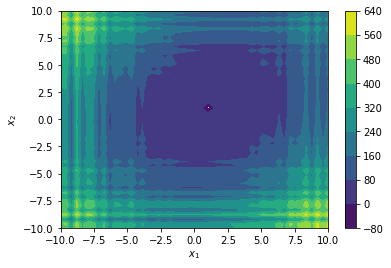

In [ ]:
Z = np.zeros((m,m))
for i,xi in enumerate(x1):
  for j,xj in enumerate(x2):
    torep = {x[0]:xi, x[1]:xj}
    fij = f.subs(torep)
    Z[i,j] = fij

X1, X2 = np.meshgrid(x1, x2);
plt.contourf(X1, X2, Z);
plt.xlabel('$x_1$');
plt.ylabel('$x_2$');
plt.colorbar()
plt.plot(1,1, marker=",", color="w")

La afirmación de que la función Levy tiene un mínimo en el punto (x1* = 1, x2* = 1) es **cierta**, y se puede verificar vizualizando la gráfica. Para esto, haremos lo siguente: \\
Dibujamos un punto en la posición 1,1. Este punto debe coincidir con el punto más bajo en la escala, es decir, debe caer el el azul más oscuro de nuestra escala de colores representativa.
